# 문제 정의 

* 타이타닉 탑승자 데이터를 기반으로 생존자 예측하는 딥러닝 모델을 생성한다. 

# EDA

In [316]:
# 파이썬의 import를 활용해 데이터 분석용 패키지인 판다스(pandas)를 읽어옴
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#train.csv 파일을 읽어옴
titanic_df = pd.read_csv('/Users/angela/Desktop/data/titanic/train.csv')
titanic_df.head( ) #head()로 train 데이터의 상위 5개를 띄움

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pandas의 info() 메서드를 사용하여 각 컬럼들의 데이터 성격 파악

In [317]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [318]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [319]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


## 데이터 분포 확인하기

In [320]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
B30              1
C111             1
B73              1
B39              1
D30              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [321]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


### 성별이 생존 확률에 어떤 영향을 미쳤는가? 
* 데이터로 시각화하여 확인한다

In [322]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

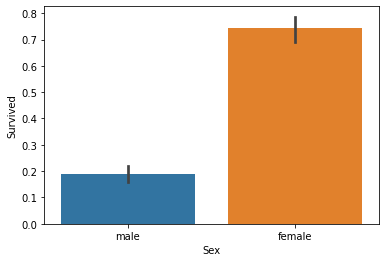

In [323]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

### 티켓의 선실 등급에 따른 생존 여부? 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

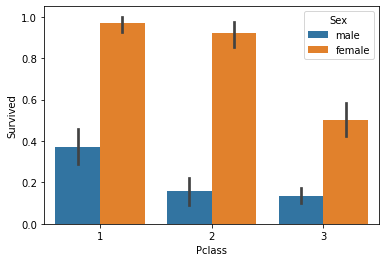

In [324]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

### 연령대에 따른 생존 여부는?
* 나이를 가지고 사용자 함수를 작성하여 연령대라는 범주형 데이터를 생성한다. 
* 연령대별 생존 여부를 그래프로 그려 내용을 확인한다.

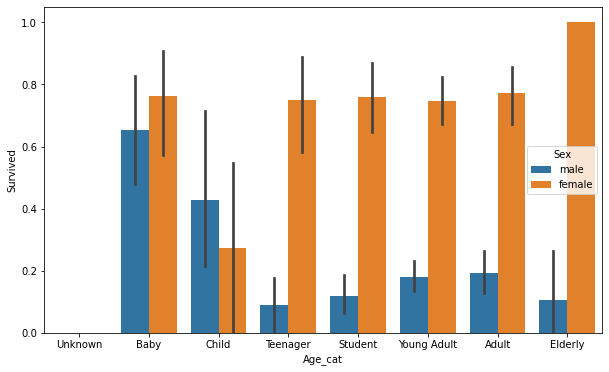

In [325]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

* 범주형 데이터의 경우 분석에 바로 사용할수 없기에 원핫인코더, 라벨인코더로 변경한다. 
* 이번에는 라벨인코더를 사용한다.

In [326]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


* Null값 및 불필요한 컬럼을 삭제

In [327]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 불필요한 칼럼 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [328]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('/Users/angela/Desktop/data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [329]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [330]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [331]:
scaler.fit(X_titanic_df)

MinMaxScaler()

In [332]:
X_train_scale = scaler.transform(X_titanic_df)

In [333]:
X_train_scale.shape

(891, 8)

In [334]:
from tensorflow import keras
import tensorflow as tf

In [335]:
X_train_scale.shape

(891, 8)

In [336]:
X_train_scale.shape

(891, 8)

In [337]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=[8],  kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization(momentum = 0.99))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.BatchNormalization(momentum = 0.99))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [338]:
# compile
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adagrad(0.01),
              metrics=['accuracy'])

In [339]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [340]:
y_train = np.asarray(y_titanic_df).astype(np.float32)

In [341]:
hist = model.fit(X_train_scale, y_train,  validation_split=0.2, epochs=500, verbose=1, callbacks=[early_stopping_cb])

Epoch 1/500
23/23 [==============================] - 1s 6ms/step - loss: 0.7320 - accuracy: 0.5253 - val_loss: 0.6732 - val_accuracy: 0.7318
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6039 - val_loss: 0.6224 - val_accuracy: 0.7095
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6433 - val_loss: 0.5885 - val_accuracy: 0.7151
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6587 - val_loss: 0.5685 - val_accuracy: 0.7207
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.6798 - val_loss: 0.5504 - val_accuracy: 0.7598
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6896 - val_loss: 0.5356 - val_accuracy: 0.7709
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7388 - val_loss: 0.5207 - val_accuracy: 0.7877
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5071 - accuracy: 0.7654 - val_loss: 0.4041 - val_accuracy: 0.8212
Epoch 60/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7921 - val_loss: 0.4042 - val_accuracy: 0.8212
Epoch 61/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7697 - val_loss: 0.4038 - val_accuracy: 0.8212
Epoch 62/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7612 - val_loss: 0.4039 - val_accuracy: 0.8156
Epoch 63/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7725 - val_loss: 0.4039 - val_accuracy: 0.8156
Epoch 64/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7626 - val_loss: 0.4042 - val_accuracy: 0.8212
Epoch 65/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7865 - val_loss: 0.4038 - val_accuracy: 0.8156
Epoch 

## 테스트 데이터 검증

In [342]:
test_df = pd.read_csv('/Users/angela/Desktop/data/titanic/test.csv')

In [343]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [344]:
test_df.shape

(418, 11)

In [345]:
test_df = transform_features(test_df)

In [346]:
test_df_scale = scaler.transform(test_df)

In [347]:
model_test_result = model.predict_classes(test_df_scale)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [348]:
result_df = pd.DataFrame(model_test_result, columns=['Survived'])

In [349]:
test_df = pd.read_csv('/Users/angela/Desktop/data/titanic/test.csv')

In [350]:
result_df2 = test_df.join(result_df)

In [351]:
result_df2[['PassengerId', 'Survived']].to_csv("submission.csv", index=False)

In [352]:
test_y = pd.read_csv('/Users/angela/Desktop/data/titanic/gender_submission.csv')

In [353]:
rt = model.evaluate(test_df_scale, test_y['Survived'] )

14/14 [==============================] - 0s 988us/step - loss: 0.2393 - accuracy: 0.9928


In [354]:
print ("accurancy : {}".format(rt[1]))

accurancy : 0.9928229451179504
